In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

# Read Data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
test3 = pd.read_csv('test3.csv')
sub = pd.read_csv('sampleSubmission.csv')
df_train.drop(['Id'], axis=1, inplace=True)
y = df_train.iloc[:, -1]
df_train = df_train.iloc[:, :-1]
test_Id = df_test.iloc[:, 0]
df_test.drop(['Id'], axis=1, inplace=True)

# Take a look at the data

In [4]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
all_data = pd.concat([df_train, df_test], axis=0, sort=False)
print(ntrain, ntest)
print(all_data.shape)
all_data.head()

15120 565892
(581012, 54)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.0,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.0,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.0,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.0,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.0,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.0,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.0,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.0,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.0,138.0,167.00,248.0
Horizontal_Distance_To_Fire_Points,15120.0,1511.147288,1099.936493,0.0,730.0,1256.0,1988.25,6993.0


## Drop useless columns

In [7]:
df_train.drop(['Soil_Type7', 'Soil_Type15'], axis=1, inplace=True)

<AxesSubplot:xlabel='Horizontal_Distance_To_Hydrology'>

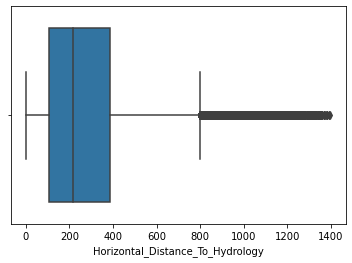

In [8]:
sns.boxplot('Horizontal_Distance_To_Hydrology', data=all_data)

# Checking correlatinos

<AxesSubplot:>

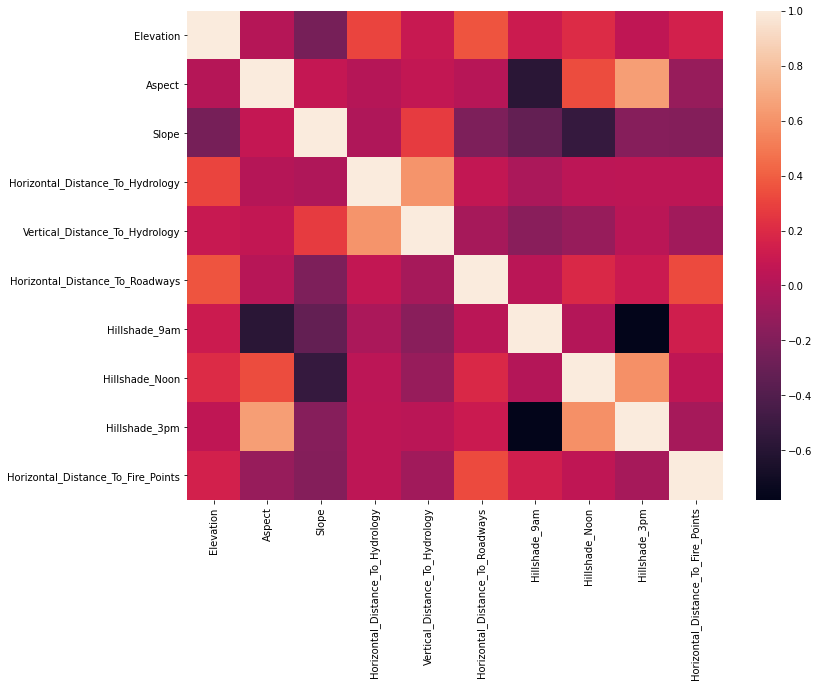

In [9]:
corrmat = all_data.iloc[:, :10].corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)

From the above corr graph we see that:

1- Hilshade at 3pm and aspect ratio are correlated

2- Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology are correlated

<AxesSubplot:xlabel='Hillshade_3pm', ylabel='Aspect'>

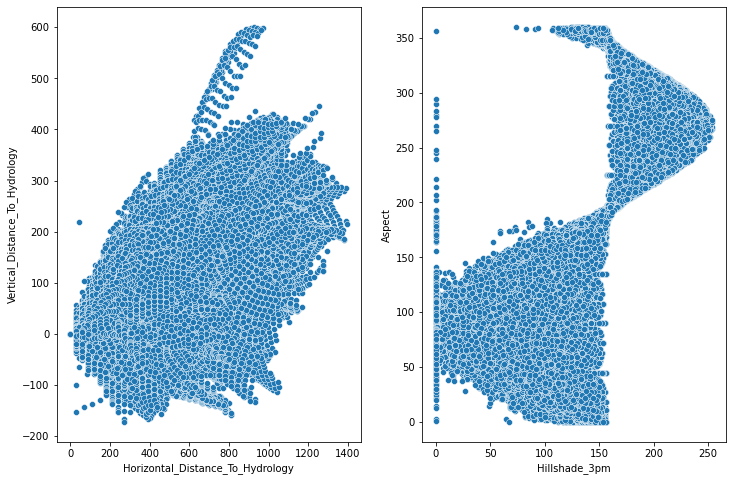

In [10]:
plt.subplots(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', data=all_data)
plt.subplot(1, 2, 2)
sns.scatterplot(x='Hillshade_3pm', y='Aspect', data=all_data)

# Adding New Features

##### We now create a new feature distance to hydrology = sqrt((Horizontal_Distance_To_Hydrology)^2 + (Vertical_Distance_To_Hydrology)^2). We will multiply with sign of vertical distance since it represents whether it is above or below. We also create few other variables.

In [11]:
a = all_data['Horizontal_Distance_To_Hydrology']
b = all_data['Vertical_Distance_To_Hydrology']
all_data['Distance_To_Hydrology'] = np.sqrt(np.power(a, 2) + np.power(b, 2))

In [12]:
all_data['Horizontal_distance'] = (all_data['Horizontal_Distance_To_Hydrology'] + 
                                   all_data['Horizontal_Distance_To_Roadways']  + 
                                   all_data['Horizontal_Distance_To_Fire_Points']) /3

In [13]:
all_data['average_hillshade'] = (all_data['Hillshade_3pm'] + 
                                 all_data['Hillshade_Noon'] + 
                                 all_data['Hillshade_9am'])/3

In [14]:
# high negative correlation, therefore making new feature
all_data['Aspect_hillshade'] = (all_data['Aspect'] * all_data['Hillshade_9am'])/255
all_data['slope_hillshade'] = (all_data['Slope'] * all_data['Hillshade_Noon'])/255
all_data['Elevation'] = [math.floor(v/50.0) for v in all_data['Elevation']]

In [15]:
all_data['EHDtH'] = all_data['Elevation'] - all_data['Horizontal_Distance_To_Hydrology'] * 0.2

In [16]:
all_data['Distanse_to_Hydrolody'] = (all_data['Horizontal_Distance_To_Hydrology'] ** 2 + 
                                     all_data['Vertical_Distance_To_Hydrology'] ** 2) ** 0.5

In [17]:
all_data['Hydro_Fire_1'] = (all_data['Horizontal_Distance_To_Hydrology'] + 
                            all_data['Horizontal_Distance_To_Fire_Points'])

In [18]:
all_data['Hydro_Fire_2'] = abs(all_data['Horizontal_Distance_To_Hydrology'] - 
                               all_data['Horizontal_Distance_To_Fire_Points'])

In [19]:
all_data['Hydro_Road_1'] = abs(all_data['Horizontal_Distance_To_Hydrology'] + 
                               all_data['Horizontal_Distance_To_Roadways'])

In [20]:
all_data['Hydro_Road_2'] = abs(all_data['Horizontal_Distance_To_Hydrology'] - 
                               all_data['Horizontal_Distance_To_Roadways'])

In [21]:
all_data['Fire_Road_1'] = abs(all_data['Horizontal_Distance_To_Fire_Points'] + 
                              all_data['Horizontal_Distance_To_Roadways'])

In [22]:
all_data['Fire_Road_2'] = abs(all_data['Horizontal_Distance_To_Fire_Points'] - 
                              all_data['Horizontal_Distance_To_Roadways'])

In [23]:
all_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Distance_To_Hydrology,Horizontal_distance,average_hillshade,Aspect_hillshade,slope_hillshade,EHDtH,Distanse_to_Hydrolody,Hydro_Fire_1,Hydro_Fire_2,Hydro_Road_1,Hydro_Road_2,Fire_Road_1,Fire_Road_2
0,51,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,258.000000,2349.000000,200.333333,44.200000,2.729412,-0.6,258.000000,6537,6021,768,252,6789,5769
1,51,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,212.084889,2275.666667,202.000000,48.313725,1.843137,8.6,212.084889,6437,6013,602,178,6615,5835
2,56,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,275.769832,3189.666667,202.333333,127.552941,8.400000,2.4,275.769832,6389,5853,3448,2912,9301,2941
3,55,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,269.235956,3181.000000,199.333333,144.666667,16.800000,6.6,269.235956,6453,5969,3332,2848,9301,3121
4,51,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,153.003268,2238.666667,201.333333,38.823529,1.835294,20.4,153.003268,6325,6019,544,238,6563,5781


In [24]:
num_labels = [i for i in all_data.columns[0:10]]
b = ['distance_to_hydrology','Horizontal_distance',
     'average_hillshade','Aspect_hillshade','slope_hillshade','EVDtH',
      'EHDtH','Distanse_to_Hydrolody', 'Hydro_Fire_1','Hydro_Fire_2','Hydro_Road_1', 
     'Hydro_Road_2','Fire_Road_1','Fire_Road_2']
num_labels.extend(b)

In [25]:
train_data = all_data.iloc[:df_train.shape[0],:]

test_data = all_data.iloc[df_train.shape[0]:,:]

# Handling Outliers doesn't give any performance improvement

In [26]:
# Outlier treatment for only continuous variables
'''
for col in num_labels:
    percentiles = train_data[col].quantile([0.01,0.99]).values
    train_data[col][train_data[col] <= percentiles[0]] = percentiles[0]
    train_data[col][train_data[col] >= percentiles[1]] = percentiles[1]
    test_data[col][test_data[col] <= percentiles[0]] = percentiles[0]
    test_data[col][test_data[col] >= percentiles[1]] = percentiles[1]
'''

'\nfor col in num_labels:\n    percentiles = train_data[col].quantile([0.01,0.99]).values\n    train_data[col][train_data[col] <= percentiles[0]] = percentiles[0]\n    train_data[col][train_data[col] >= percentiles[1]] = percentiles[1]\n    test_data[col][test_data[col] <= percentiles[0]] = percentiles[0]\n    test_data[col][test_data[col] >= percentiles[1]] = percentiles[1]\n'

# Scaling

In [27]:
# Scaling
rs = RobustScaler()
rs.fit(train_data)
train_data = rs.transform(train_data)
test_data = rs.transform(test_data)
train_data = pd.DataFrame(train_data, columns = all_data.columns)
test_data = pd.DataFrame(test_data, columns = all_data.columns)

In [28]:
train_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Distance_To_Hydrology,Horizontal_distance,average_hillshade,Aspect_hillshade,slope_hillshade,EHDtH,Distanse_to_Hydrolody,Hydro_Fire_1,Hydro_Fire_2,Hydro_Road_1,Hydro_Road_2,Fire_Road_1,Fire_Road_2
0,-0.266667,-0.382653,-1.000000,0.296578,-0.432432,-0.535193,0.025641,0.321429,0.163934,3.992052,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252905,1.638257,0.380952,-0.650545,-1.142374,-0.378049,0.252905,3.627591,4.185511,-0.461878,-0.594164,1.759299,5.529602
1,-0.266667,-0.357143,-1.083333,0.121673,-0.513514,-0.614874,0.000000,0.428571,0.213115,3.949136,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085870,1.554175,0.460317,-0.615041,-1.237854,-0.191057,0.085870,3.556112,4.178811,-0.566478,-0.643236,1.687584,5.600646
2,0.066667,0.066327,-0.500000,0.334601,0.445946,1.237716,0.358974,0.535714,-0.049180,3.866481,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.317550,2.602140,0.476190,0.068842,-0.531474,-0.317073,0.317550,3.521801,4.044807,1.226843,1.169761,2.794642,2.485468
3,0.000000,0.147959,0.250000,0.235741,1.162162,1.177955,0.461538,0.535714,-0.262295,3.938009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293780,2.592203,0.333333,0.216544,0.373469,-0.231707,0.293780,3.567548,4.141960,1.153749,1.127321,2.794642,2.679225
4,-0.266667,-0.413265,-1.083333,-0.102662,-0.445946,-0.614210,0.000000,0.392857,0.196721,3.907014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.129064,1.511752,0.428571,-0.696947,-1.238699,0.048780,-0.129064,3.476054,4.183836,-0.603025,-0.603448,1.666151,5.542519


In [29]:
test_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Distance_To_Hydrology,Horizontal_distance,average_hillshade,Aspect_hillshade,slope_hillshade,EHDtH,Distanse_to_Hydrolody,Hydro_Fire_1,Hydro_Fire_2,Hydro_Road_1,Hydro_Road_2,Fire_Road_1,Fire_Road_2
0,-0.133333,1.163265,-0.083333,-0.684411,-0.432432,0.908367,-0.615385,-0.321429,0.295082,4.282933,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.685677,2.510415,-0.174603,1.316320,-0.170680,0.711382,-0.685677,3.704789,4.708124,0.745432,1.018568,2.806182,3.583423
1,-0.133333,-0.642857,-0.166667,-0.684411,-0.432432,0.888446,-0.487179,-0.250000,0.229508,4.306775,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.685677,2.510415,-0.126984,-1.032018,-0.250106,0.711382,-0.685677,3.726233,4.733250,0.726528,0.998674,2.806182,3.648009
2,-0.066667,-0.561224,0.000000,-0.684411,-0.432432,1.104914,-0.358974,-0.535714,-0.016393,4.043712,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.685677,2.508504,-0.412698,-0.920463,-0.118293,0.731707,-0.685677,3.489635,4.456030,0.931947,1.214854,2.804122,2.940797
3,-0.066667,-0.520408,0.166667,-0.684411,-0.432432,1.084993,-0.307692,-0.785714,-0.213115,4.067554,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.685677,2.508504,-0.682540,-0.863061,0.007182,0.731707,-0.685677,3.511079,4.481156,0.913043,1.194960,2.804122,3.005382
4,-0.066667,-0.494898,0.333333,-0.684411,-0.432432,1.065073,-0.256410,-1.000000,-0.377049,4.091397,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.685677,2.508504,-0.904762,-0.825899,0.128855,0.731707,-0.685677,3.532523,4.506281,0.894140,1.175066,2.804122,3.069968


# Handling Skewness doesn't give any performance improvement

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size = 0.1, shuffle= True)

# Modelling

In [31]:
etc = ExtraTreesClassifier(n_estimators=400)
etc.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=400)

In [32]:
u = etc.predict(X_test)
print(accuracy_score(u, y_test))
print(cross_val_score(etc, X_test, y_test, cv=5).mean())

0.8902116402116402
0.7473695713942254


In [33]:
etc.fit(train_data, y)
test_predictions = etc.predict(test_data)

In [34]:
len(test_predictions)

565892

In [35]:
solutions = pd.DataFrame({'Id': test_Id, 'Cover_Type': test_predictions})
solutions.to_csv('finsubmission.csv',index=False)